Colonnes disponibles dans les données nettoyées: Index(['RLT', 'DLT', 'CLT', 'STABLE', 'DLT23', 'LIBELLE', 'csx_rec1rpop1968',
       'csx_rec2rpop1968', 'csx_rec3rpop1968', 'csx_rec4rpop1968',
       'csx_rec5rpop1968', 'csx_rec6rpop1968'],
      dtype='object', name=13)
Colonnes disponibles dans les données nettoyées: Index(['RLT', 'DLT', 'CLT', 'STABLE', 'DLT23', 'LIBELLE', 'csx_rec1rpop2021',
       'csx_rec2rpop2021', 'csx_rec3rpop2021', 'csx_rec4rpop2021',
       'csx_rec5rpop2021', 'csx_rec6rpop2021'],
      dtype='object', name=13)


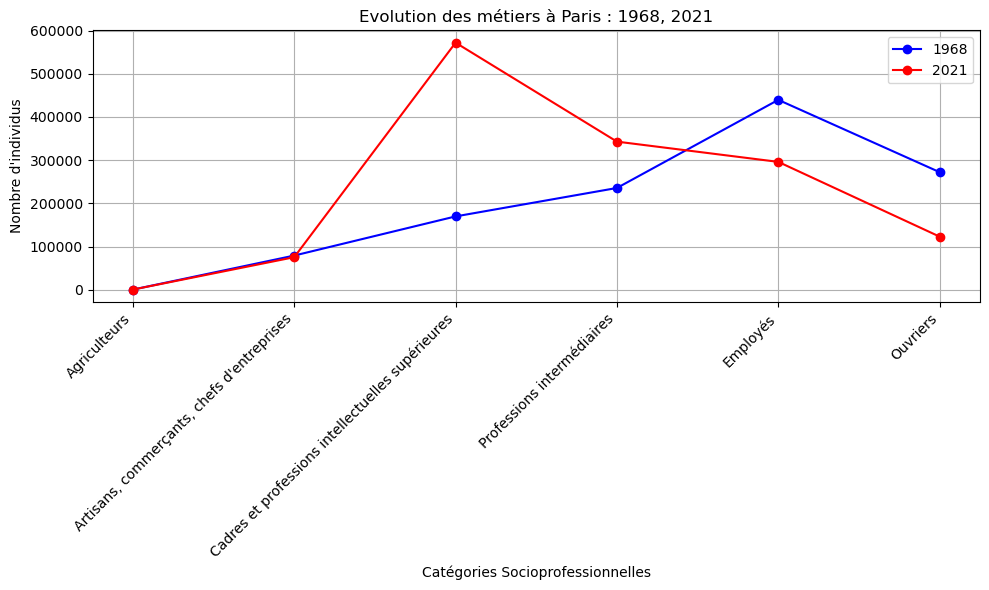

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger le fichier Excel
file_path = 'table.xlsx'
xls_new = pd.ExcelFile(file_path)

# Charger les feuilles pour 1968 et 2021
df_1968_new = xls_new.parse('COM_1968')
df_2021_new = xls_new.parse('COM_2021')

# Nettoyage des données pour chaque année
def clean_data(df, year):
    # Sauter les lignes inutiles (les lignes de métadonnées et autres informations)
    df_clean = df.iloc[13:]  # Commencer à partir de la ligne contenant les données réelles
    
    # Renommer les colonnes pour les catégories socioprofessionnelles
    df_clean.columns = df_clean.iloc[0]
    df_clean = df_clean[1:]
    
    # Vérifier les noms des colonnes pour identifier celle contenant les codes géographiques
    print("Colonnes disponibles dans les données nettoyées:", df_clean.columns)
    
    # Filtrer Paris (code 75)
    df_paris = df_clean[df_clean['DLT23'] == '75']  # Utilisation de 'DLT23' pour filtrer Paris
    
    # Renommer les colonnes pour chaque CSP
    df_paris_renamed = df_paris.rename(columns={
        'csx_rec1rpop' + year: 'Agriculteurs',
        'csx_rec2rpop' + year: "Artisans, commerçants, chefs d'entreprises",
        'csx_rec3rpop' + year: 'Cadres et professions intellectuelles supérieures',
        'csx_rec4rpop' + year: 'Professions intermédiaires',
        'csx_rec5rpop' + year: 'Employés',
        'csx_rec6rpop' + year: 'Ouvriers'
    })
    
    # Garder uniquement les colonnes utiles
    df_paris_final = df_paris_renamed[[
        'LIBELLE',
        'Agriculteurs',
        "Artisans, commerçants, chefs d'entreprises",
        'Cadres et professions intellectuelles supérieures',
        'Professions intermédiaires',
        'Employés',
        'Ouvriers'
    ]]
    
    return df_paris_final

# Appliquer le nettoyage sur les deux années (1968 et 2021)
df_1968_clean = clean_data(df_1968_new, '1968')
df_2021_clean = clean_data(df_2021_new, '2021')

# Comparer les métiers en utilisant un graphique
def plot_comparison(df_1968_clean, df_2021_clean):
    # Extraire les données des catégories pour les deux années
    categories = ['Agriculteurs', "Artisans, commerçants, chefs d'entreprises", 
                  'Cadres et professions intellectuelles supérieures', 
                  'Professions intermédiaires', 'Employés', 'Ouvriers']
    
    # Calculer la somme des valeurs pour chaque catégorie par année
    values_1968 = df_1968_clean[categories].sum()
    values_2021 = df_2021_clean[categories].sum()
    
    # Créer un graphique pour l'évolution des CSP
    plt.figure(figsize=(10, 6))
    plt.plot(categories, values_1968, label='1968', marker='o', linestyle='-', color='blue')
    plt.plot(categories, values_2021, label='2021', marker='o', linestyle='-', color='red')
    
    # Ajouter des labels et une légende
    plt.title("Evolution des métiers à Paris : 1968, 2021")
    plt.xlabel("Catégories Socioprofessionnelles")
    plt.ylabel("Nombre d'individus")
    plt.xticks(rotation=45, ha='right')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    
    # Afficher le graphique
    plt.show()

# Exécuter la fonction de comparaison entre 1968 et 2021
plot_comparison(df_1968_clean, df_2021_clean)



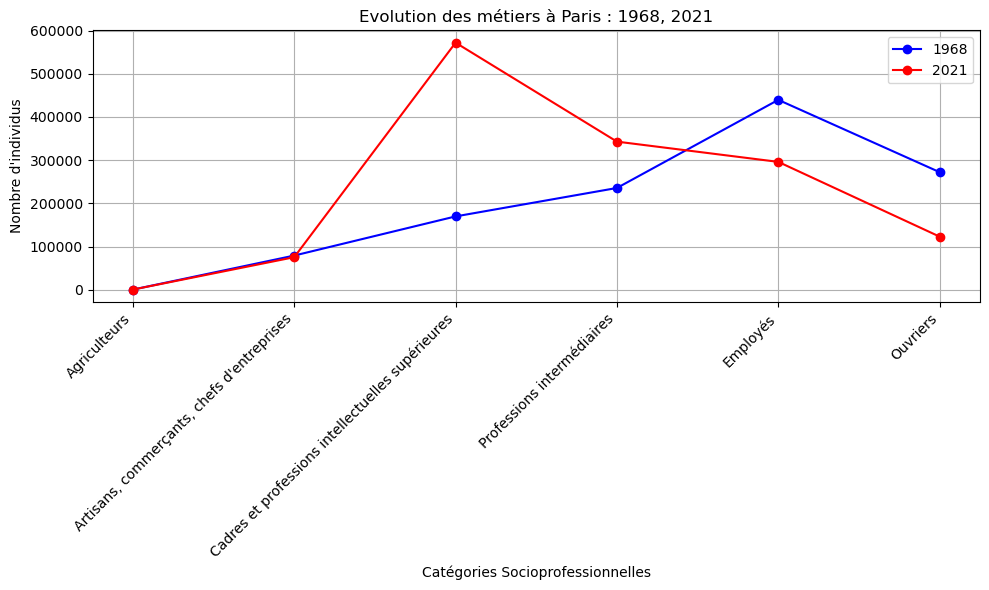

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger les données de Paris
file_path = 'table.xlsx'
xls_new = pd.ExcelFile(file_path)

df_1968_new = xls_new.parse('COM_1968')
df_2021_new = xls_new.parse('COM_2021')

# Fonction de nettoyage des données
def clean_data(df, year):
    df_clean = df.iloc[13:]  # Ignorer les lignes de métadonnées
    df_clean.columns = df_clean.iloc[0]
    df_clean = df_clean[1:]
    
    # Filtrer Paris (code 75)
    df_paris = df_clean[df_clean['DLT23'] == '75']
    
    # Renommer les colonnes pour les CSP
    df_paris_renamed = df_paris.rename(columns={
        'csx_rec1rpop' + year: 'Agriculteurs',
        'csx_rec2rpop' + year: "Artisans, commerçants, chefs d'entreprises",
        'csx_rec3rpop' + year: 'Cadres et professions intellectuelles supérieures',
        'csx_rec4rpop' + year: 'Professions intermédiaires',
        'csx_rec5rpop' + year: 'Employés',
        'csx_rec6rpop' + year: 'Ouvriers'
    })
    
    return df_paris_renamed

# Nettoyer les données pour Paris 1968 et 2021
df_1968_clean = clean_data(df_1968_new, '1968')
df_2021_clean = clean_data(df_2021_new, '2021')

# Comparaison des catégories socioprofessionnelles à Paris entre 1968 et 2021
def plot_comparison(df_1968_clean, df_2021_clean):
    categories = ['Agriculteurs', "Artisans, commerçants, chefs d'entreprises", 
                  'Cadres et professions intellectuelles supérieures', 
                  'Professions intermédiaires', 'Employés', 'Ouvriers']
    
    values_1968 = df_1968_clean[categories].sum()
    values_2021 = df_2021_clean[categories].sum()
    
    plt.figure(figsize=(10, 6))
    plt.plot(categories, values_1968, label='1968', marker='o', linestyle='-', color='blue')
    plt.plot(categories, values_2021, label='2021', marker='o', linestyle='-', color='red')
    
    plt.title("Evolution des métiers à Paris : 1968, 2021")
    plt.xlabel("Catégories Socioprofessionnelles")
    plt.ylabel("Nombre d'individus")
    plt.xticks(rotation=45, ha='right')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    
    plt.show()

# Exécuter la comparaison
plot_comparison(df_1968_clean, df_2021_clean)

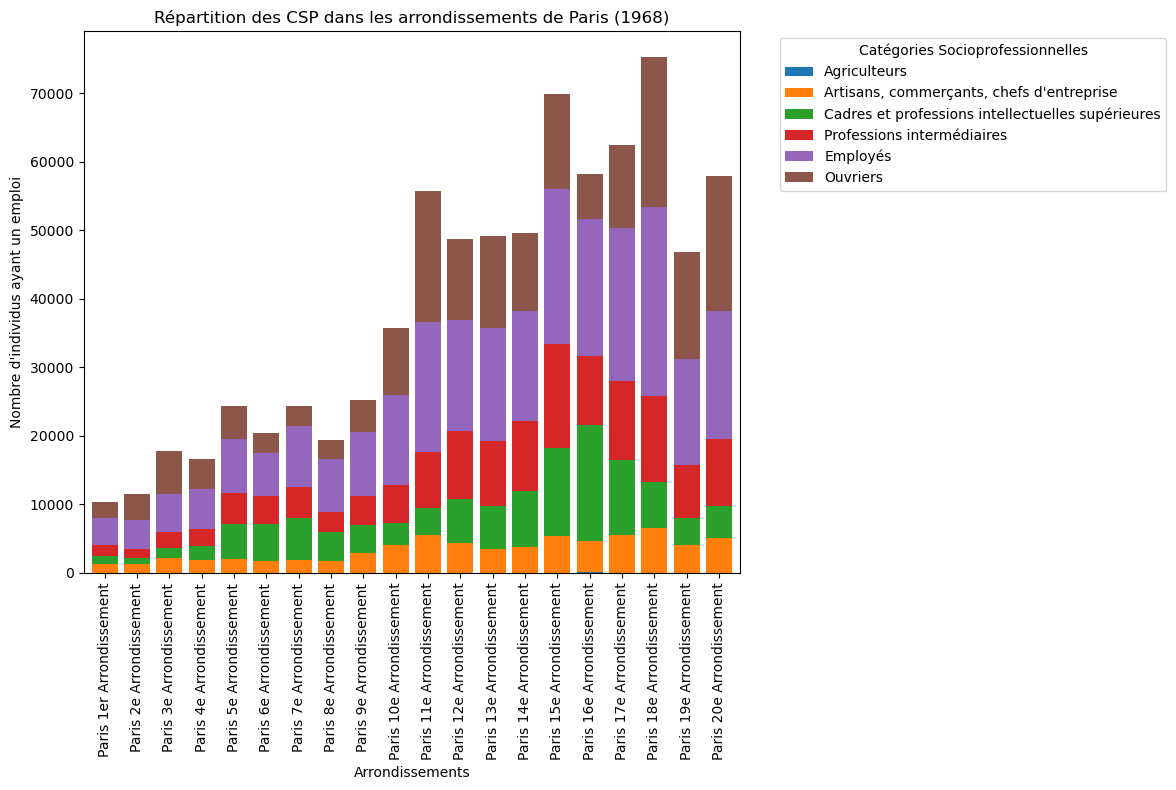

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger le fichier Excel
file_path = 'pop-act2554-csp-cd-6821.xlsx'
xls = pd.ExcelFile(file_path)

# Charger les données pour Paris (1968)
df_1968 = xls.parse('COM_1968')

# Nettoyage des données pour 1968
def clean_data_paris(df, year):
    # Commencer à partir de la ligne contenant les données réelles (ligne 13)
    df_clean = df.iloc[13:]
    df_clean.columns = df_clean.iloc[0]
    df_clean = df_clean[1:]  # Supprimer la ligne des noms de colonnes
    
    # Nettoyer les noms des colonnes
    df_clean.columns = df_clean.columns.str.strip().str.replace('\n', ' ', regex=True)
    
    # Filtrer Paris (code 75)
    df_paris = df_clean[df_clean['Département en géographie courante'] == '75']
    
    # Sélectionner uniquement les colonnes pertinentes pour la catégorie socio-professionnelle et la commune
    df_paris = df_paris[['Libellé de commune', 
                         'Agriculteurs Actifs ayant un emploi RP1968', 
                         'Artisans, commerçants, chefs d\'entreprise Actifs ayant un emploi RP1968',
                         'Cadres et professions intellectuelles supérieures Actifs ayant un emploi RP1968',
                         'Professions intermédiaires Actifs ayant un emploi RP1968',
                         'Employés Actifs ayant un emploi RP1968',
                         'Ouvriers Actifs ayant un emploi RP1968']]
    
    # Renommer les colonnes pour les rendre plus compréhensibles
    df_paris = df_paris.rename(columns={
        'Libellé de commune': 'Commune',
        'Agriculteurs Actifs ayant un emploi RP1968': 'Agriculteurs',
        'Artisans, commerçants, chefs d\'entreprise Actifs ayant un emploi RP1968': 'Artisans, commerçants, chefs d\'entreprise',
        'Cadres et professions intellectuelles supérieures Actifs ayant un emploi RP1968': 'Cadres et professions intellectuelles supérieures',
        'Professions intermédiaires Actifs ayant un emploi RP1968': 'Professions intermédiaires',
        'Employés Actifs ayant un emploi RP1968': 'Employés',
        'Ouvriers Actifs ayant un emploi RP1968': 'Ouvriers'
    })
    
    return df_paris

# Appliquer le nettoyage des données pour 1968
df_1968_paris = clean_data_paris(df_1968, '1968')

# Tracer la répartition des CSP dans les arrondissements de Paris
def plot_csp_distribution_paris(df_paris_csp):
    # Mettre en place le graphique
    df_paris_csp.set_index('Commune', inplace=True)
    ax = df_paris_csp.plot(kind='bar', stacked=True, figsize=(12, 8), width=0.8)
    
    # Ajouter des labels et un titre
    plt.title("Répartition des CSP dans les arrondissements de Paris (1968)")
    plt.xlabel("Arrondissements")
    plt.ylabel("Nombre d'individus ayant un emploi")
    plt.xticks(rotation=90)
    plt.legend(title="Catégories Socioprofessionnelles", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    
    # Afficher le graphique
    plt.show()

# Exécuter la fonction pour afficher la répartition des CSP
plot_csp_distribution_paris(df_1968_paris)

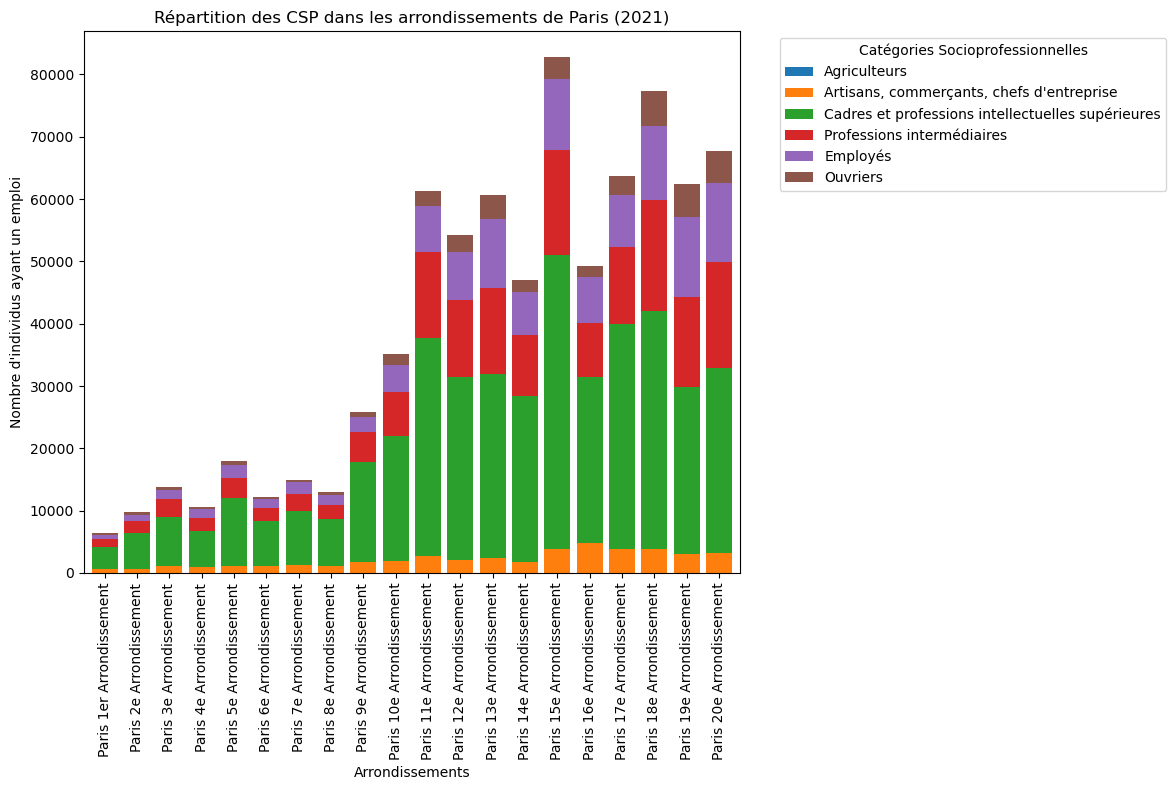

In [52]:

import pandas as pd
import matplotlib.pyplot as plt

# Charger le fichier Excel
file_path = 'pop-act2554-csp-cd-6821.xlsx'
xls = pd.ExcelFile(file_path)

# Charger les données pour 2021
df_2021 = xls.parse('COM_2021')

# Nettoyage des données pour 2021
def clean_data_paris_2021(df, year):
    # Commencer à partir de la ligne contenant les données réelles (ligne 13)
    df_clean = df.iloc[13:]
    df_clean.columns = df_clean.iloc[0]
    df_clean = df_clean[1:]  # Supprimer la ligne des noms de colonnes
    
    # Nettoyer les noms des colonnes
    df_clean.columns = df_clean.columns.str.strip().str.replace('\n', ' ', regex=True)
    
    # Filtrer Paris (code 75)
    df_paris = df_clean[df_clean['Département en géographie courante'] == '75']
    
    # Sélectionner uniquement les colonnes pertinentes pour la catégorie socio-professionnelle et la commune
    df_paris = df_paris[['Libellé de commune', 
                         'Agriculteurs Actifs ayant un emploi RP2021', 
                         'Artisans, commerçants, chefs d\'entreprise Actifs ayant un emploi RP2021',
                         'Cadres et professions intellectuelles supérieures Actifs ayant un emploi RP2021',
                         'Professions intermédiaires Actifs ayant un emploi RP2021',
                         'Employés Actifs ayant un emploi RP2021',
                         'Ouvriers Actifs ayant un emploi RP2021']]
    
    # Renommer les colonnes pour les rendre plus compréhensibles
    df_paris = df_paris.rename(columns={
        'Libellé de commune': 'Commune',
        'Agriculteurs Actifs ayant un emploi RP2021': 'Agriculteurs',
        'Artisans, commerçants, chefs d\'entreprise Actifs ayant un emploi RP2021': 'Artisans, commerçants, chefs d\'entreprise',
        'Cadres et professions intellectuelles supérieures Actifs ayant un emploi RP2021': 'Cadres et professions intellectuelles supérieures',
        'Professions intermédiaires Actifs ayant un emploi RP2021': 'Professions intermédiaires',
        'Employés Actifs ayant un emploi RP2021': 'Employés',
        'Ouvriers Actifs ayant un emploi RP2021': 'Ouvriers'
    })
    
    return df_paris

# Appliquer le nettoyage des données pour 2021
df_2021_paris = clean_data_paris_2021(df_2021, '2021')

# Tracer la répartition des CSP dans les arrondissements de Paris pour 2021
def plot_csp_distribution_paris_2021(df_paris_csp_2021):
    # Mettre en place le graphique
    df_paris_csp_2021.set_index('Commune', inplace=True)
    ax = df_paris_csp_2021.plot(kind='bar', stacked=True, figsize=(12, 8), width=0.8)
    
    # Ajouter des labels et un titre
    plt.title("Répartition des CSP dans les arrondissements de Paris (2021)")
    plt.xlabel("Arrondissements")
    plt.ylabel("Nombre d'individus ayant un emploi")
    plt.xticks(rotation=90)
    plt.legend(title="Catégories Socioprofessionnelles", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    
    # Afficher le graphique
    plt.show()

# Exécuter la fonction pour afficher la répartition des CSP pour 2021
plot_csp_distribution_paris_2021(df_2021_paris)

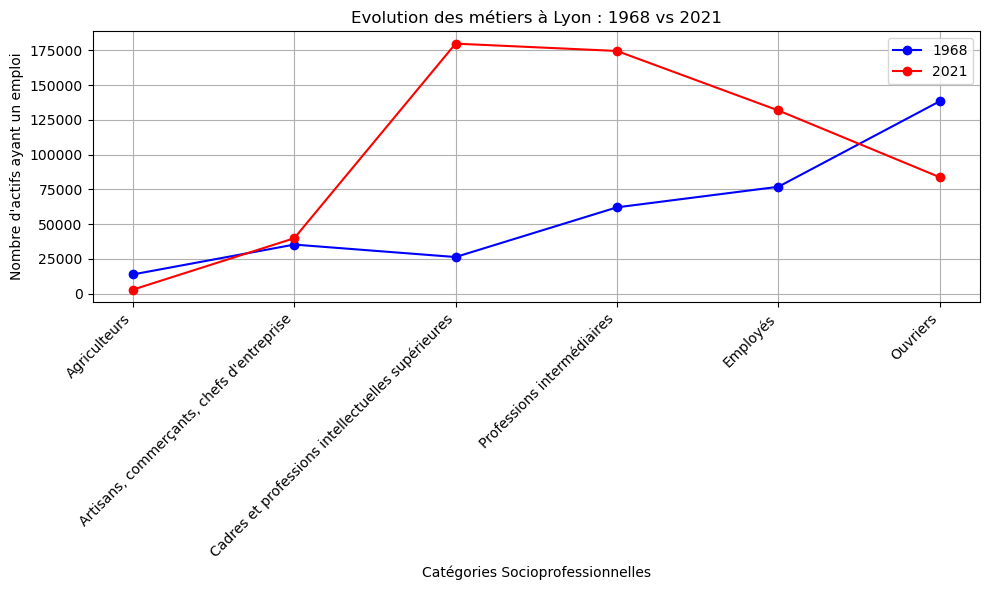

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger le fichier Excel
file_path = 'pop-act2554-csp-cd-6821.xlsx'
xls = pd.ExcelFile(file_path)

# Charger les données pour Lyon (1968 et 2021)
df_1968 = xls.parse('COM_1968')
df_2021 = xls.parse('COM_2021')

# Nettoyer les données pour Lyon en 1968 et 2021
def clean_data_lyon(df, year):
    # Commencer à partir de la ligne contenant les données réelles (ligne 13)
    df_clean = df.iloc[13:]
    df_clean.columns = df_clean.iloc[0]
    df_clean = df_clean[1:]  # Supprimer la ligne des noms de colonnes
    
    # Nettoyer les noms des colonnes
    df_clean.columns = df_clean.columns.str.strip().str.replace('\n', ' ', regex=True)
    
    # Filtrer Lyon (code 69)
    df_lyon = df_clean[df_clean['Département en géographie courante'] == '69']  # Lyon (code 69)
    
    # Sélectionner uniquement les colonnes pertinentes pour la catégorie socio-professionnelle et la commune
    df_lyon = df_lyon[['Libellé de commune', 
                       f'Agriculteurs Actifs ayant un emploi RP{year}', 
                       f'Artisans, commerçants, chefs d\'entreprise Actifs ayant un emploi RP{year}',
                       f'Cadres et professions intellectuelles supérieures Actifs ayant un emploi RP{year}',
                       f'Professions intermédiaires Actifs ayant un emploi RP{year}',
                       f'Employés Actifs ayant un emploi RP{year}',
                       f'Ouvriers Actifs ayant un emploi RP{year}']]
    
    # Renommer les colonnes pour les rendre plus compréhensibles
    df_lyon = df_lyon.rename(columns={
        'Libellé de commune': 'Commune',
        f'Agriculteurs Actifs ayant un emploi RP{year}': 'Agriculteurs',
        f'Artisans, commerçants, chefs d\'entreprise Actifs ayant un emploi RP{year}': 'Artisans, commerçants, chefs d\'entreprise',
        f'Cadres et professions intellectuelles supérieures Actifs ayant un emploi RP{year}': 'Cadres et professions intellectuelles supérieures',
        f'Professions intermédiaires Actifs ayant un emploi RP{year}': 'Professions intermédiaires',
        f'Employés Actifs ayant un emploi RP{year}': 'Employés',
        f'Ouvriers Actifs ayant un emploi RP{year}': 'Ouvriers'
    })
    
    return df_lyon

# Appliquer le nettoyage des données pour Lyon en 1968 et 2021
df_1968_lyon = clean_data_lyon(df_1968, '1968')
df_2021_lyon = clean_data_lyon(df_2021, '2021')

# Créer un graphique de comparaison des CSP pour Lyon entre 1968 et 2021
def plot_csp_comparison_lyon(df_1968_lyon, df_2021_lyon):
    # Tracer les barres pour chaque catégorie socio-professionnelle dans chaque année
    categories = ['Agriculteurs', "Artisans, commerçants, chefs d'entreprise", 
                  'Cadres et professions intellectuelles supérieures', 
                  'Professions intermédiaires', 'Employés', 'Ouvriers']
    
    # Calculer la somme des valeurs pour chaque catégorie par année
    values_1968 = df_1968_lyon[categories].sum()
    values_2021 = df_2021_lyon[categories].sum()
    
    # Créer un graphique pour l'évolution des CSP
    plt.figure(figsize=(10, 6))
    plt.plot(categories, values_1968, label='1968', marker='o', linestyle='-', color='blue')
    plt.plot(categories, values_2021, label='2021', marker='o', linestyle='-', color='red')
    
    # Ajouter des labels et une légende
    plt.title("Evolution des métiers à Lyon : 1968 vs 2021")
    plt.xlabel("Catégories Socioprofessionnelles")
    plt.ylabel("Nombre d'actifs ayant un emploi")
    plt.xticks(rotation=45, ha='right')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    
    # Afficher le graphique
    plt.show()

# Exécuter la fonction de comparaison pour Lyon entre 1968 et 2021
plot_csp_comparison_lyon(df_1968_lyon, df_2021_lyon)

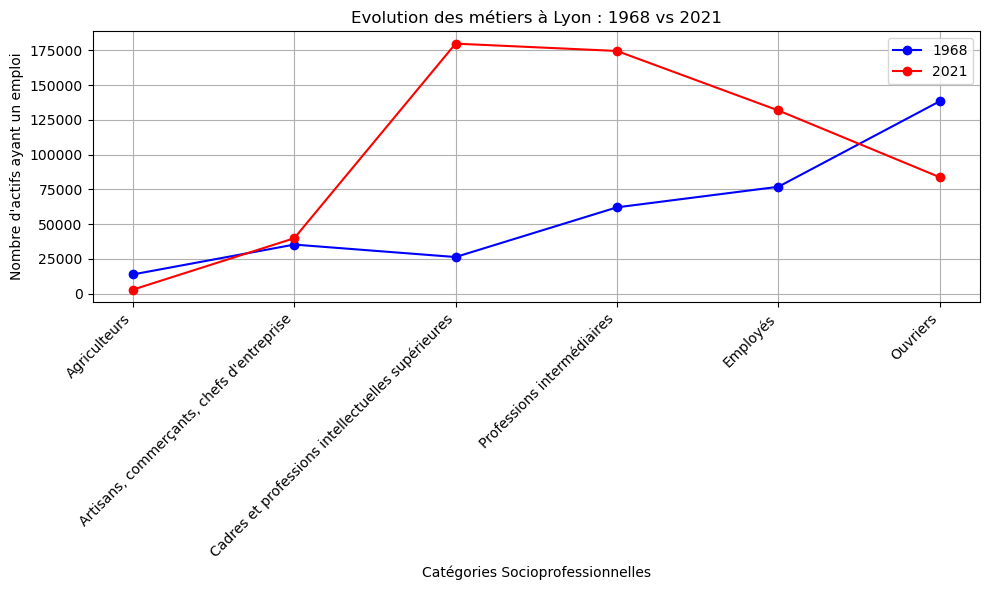

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger le fichier Excel
file_path = 'pop-act2554-csp-cd-6821.xlsx'
xls = pd.ExcelFile(file_path)

# Charger les données pour Lyon (1968 et 2021)
df_1968 = xls.parse('COM_1968')
df_2021 = xls.parse('COM_2021')

# Nettoyage des données pour 1968 et 2021
def clean_data_lyon(df, year):
    # Commencer à partir de la ligne contenant les données réelles (ligne 13)
    df_clean = df.iloc[13:]
    df_clean.columns = df_clean.iloc[0]
    df_clean = df_clean[1:]  # Supprimer la ligne des noms de colonnes
    
    # Nettoyer les noms des colonnes
    df_clean.columns = df_clean.columns.str.strip().str.replace('\n', ' ', regex=True)
    
    # Filtrer Lyon (code 69)
    df_lyon = df_clean[df_clean['Département en géographie courante'] == '69']  # Lyon (code 69)
    
    # Adapter les noms des colonnes en fonction de l'année (1968 ou 2021)
    if year == '1968':
        columns_lyon = ['Libellé de commune', 
                        'Agriculteurs Actifs ayant un emploi RP1968', 
                        'Artisans, commerçants, chefs d\'entreprise Actifs ayant un emploi RP1968',
                        'Cadres et professions intellectuelles supérieures Actifs ayant un emploi RP1968',
                        'Professions intermédiaires Actifs ayant un emploi RP1968',
                        'Employés Actifs ayant un emploi RP1968',
                        'Ouvriers Actifs ayant un emploi RP1968']
    else:  # Pour 2021
        columns_lyon = ['Libellé de commune', 
                        'Agriculteurs Actifs ayant un emploi RP2021', 
                        'Artisans, commerçants, chefs d\'entreprise Actifs ayant un emploi RP2021',
                        'Cadres et professions intellectuelles supérieures Actifs ayant un emploi RP2021',
                        'Professions intermédiaires Actifs ayant un emploi RP2021',
                        'Employés Actifs ayant un emploi RP2021',
                        'Ouvriers Actifs ayant un emploi RP2021']
    
    # Sélectionner les colonnes pertinentes
    df_lyon = df_lyon[columns_lyon]
    
    # Renommer les colonnes pour les rendre plus compréhensibles
    df_lyon = df_lyon.rename(columns={
        'Libellé de commune': 'Commune',
        'Agriculteurs Actifs ayant un emploi RP1968' if year == '1968' else 'Agriculteurs Actifs ayant un emploi RP2021': 'Agriculteurs',
        'Artisans, commerçants, chefs d\'entreprise Actifs ayant un emploi RP1968' if year == '1968' else 'Artisans, commerçants, chefs d\'entreprise Actifs ayant un emploi RP2021': 'Artisans, commerçants, chefs d\'entreprise',
        'Cadres et professions intellectuelles supérieures Actifs ayant un emploi RP1968' if year == '1968' else 'Cadres et professions intellectuelles supérieures Actifs ayant un emploi RP2021': 'Cadres et professions intellectuelles supérieures',
        'Professions intermédiaires Actifs ayant un emploi RP1968' if year == '1968' else 'Professions intermédiaires Actifs ayant un emploi RP2021': 'Professions intermédiaires',
        'Employés Actifs ayant un emploi RP1968' if year == '1968' else 'Employés Actifs ayant un emploi RP2021': 'Employés',
        'Ouvriers Actifs ayant un emploi RP1968' if year == '1968' else 'Ouvriers Actifs ayant un emploi RP2021': 'Ouvriers'
    })
    
    return df_lyon

# Appliquer le nettoyage des données pour Lyon en 1968 et 2021
df_1968_lyon = clean_data_lyon(df_1968, '1968')
df_2021_lyon = clean_data_lyon(df_2021, '2021')

# Créer un graphique de comparaison des CSP pour Lyon entre 1968 et 2021
def plot_csp_comparison_lyon(df_1968_lyon, df_2021_lyon):
    # Tracer les barres pour chaque catégorie socio-professionnelle dans chaque année
    categories = ['Agriculteurs', "Artisans, commerçants, chefs d'entreprise", 
                  'Cadres et professions intellectuelles supérieures', 
                  'Professions intermédiaires', 'Employés', 'Ouvriers']
    
    # Calculer la somme des valeurs pour chaque catégorie par année
    values_1968 = df_1968_lyon[categories].sum()
    values_2021 = df_2021_lyon[categories].sum()
    
    # Créer un graphique pour l'évolution des CSP
    plt.figure(figsize=(10, 6))
    plt.plot(categories, values_1968, label='1968', marker='o', linestyle='-', color='blue')
    plt.plot(categories, values_2021, label='2021', marker='o', linestyle='-', color='red')
    
    # Ajouter des labels et une légende
    plt.title("Evolution des métiers à Lyon : 1968 vs 2021")
    plt.xlabel("Catégories Socioprofessionnelles")
    plt.ylabel("Nombre d'actifs ayant un emploi")
    plt.xticks(rotation=45, ha='right')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    
    # Afficher le graphique
    plt.show()

# Exécuter la fonction de comparaison pour Lyon entre 1968 et 2021
plot_csp_comparison_lyon(df_1968_lyon, df_2021_lyon)



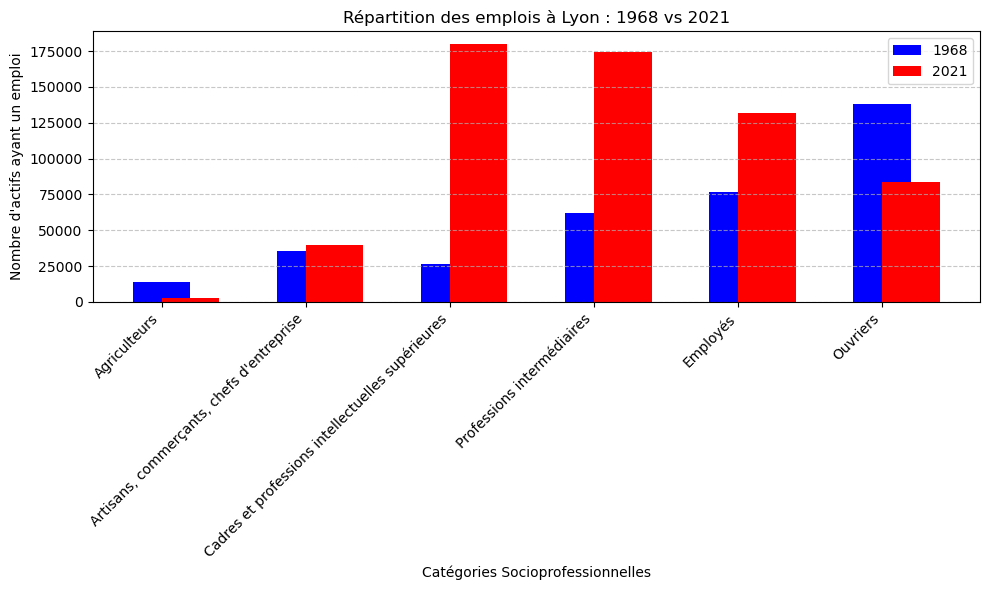

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger les fichiers Excel
file_path = 'pop-act2554-csp-cd-6821.xlsx'
xls = pd.ExcelFile(file_path)

# Charger les données pour Lyon (1968 et 2021)
df_1968 = xls.parse('COM_1968')
df_2021 = xls.parse('COM_2021')

# Nettoyage des données pour Lyon
def clean_data_lyon(df, year):
    df_clean = df.iloc[13:]  # Commencer à partir de la ligne contenant les données réelles
    df_clean.columns = df_clean.iloc[0]
    df_clean = df_clean[1:]  # Supprimer la ligne des noms de colonnes

    # Nettoyer les noms des colonnes
    df_clean.columns = df_clean.columns.str.strip().str.replace('\n', ' ', regex=True)

    # Filtrer Lyon (code 69)
    df_lyon = df_clean[df_clean['Département en géographie courante'] == '69']  # Lyon (code 69)

    # Sélectionner uniquement les colonnes pertinentes pour les CSP
    csp_columns = ['Libellé de commune',
                   f'Agriculteurs Actifs ayant un emploi RP{year}',
                   f'Artisans, commerçants, chefs d\'entreprise Actifs ayant un emploi RP{year}',
                   f'Cadres et professions intellectuelles supérieures Actifs ayant un emploi RP{year}',
                   f'Professions intermédiaires Actifs ayant un emploi RP{year}',
                   f'Employés Actifs ayant un emploi RP{year}',
                   f'Ouvriers Actifs ayant un emploi RP{year}']

    df_lyon = df_lyon[csp_columns]

    # Renommer les colonnes pour les rendre plus compréhensibles
    df_lyon = df_lyon.rename(columns={
        'Libellé de commune': 'Commune',
        f'Agriculteurs Actifs ayant un emploi RP{year}': 'Agriculteurs',
        f'Artisans, commerçants, chefs d\'entreprise Actifs ayant un emploi RP{year}': 'Artisans, commerçants, chefs d\'entreprise',
        f'Cadres et professions intellectuelles supérieures Actifs ayant un emploi RP{year}': 'Cadres et professions intellectuelles supérieures',
        f'Professions intermédiaires Actifs ayant un emploi RP{year}': 'Professions intermédiaires',
        f'Employés Actifs ayant un emploi RP{year}': 'Employés',
        f'Ouvriers Actifs ayant un emploi RP{year}': 'Ouvriers'
    })

    return df_lyon

# Appliquer le nettoyage des données pour Lyon en 1968 et 2021
df_1968_lyon = clean_data_lyon(df_1968, '1968')
df_2021_lyon = clean_data_lyon(df_2021, '2021')

# Créer un graphique de la répartition des emplois par catégorie socio-professionnelle
def plot_csp_distribution_lyon(df_lyon_1968, df_lyon_2021):
    # Tracer les barres pour chaque catégorie socio-professionnelle dans chaque année
    categories = ['Agriculteurs', "Artisans, commerçants, chefs d'entreprise", 
                  'Cadres et professions intellectuelles supérieures', 
                  'Professions intermédiaires', 'Employés', 'Ouvriers']
    
    # Calculer la somme des valeurs pour chaque catégorie par année
    values_1968 = df_1968_lyon[categories].sum()
    values_2021 = df_2021_lyon[categories].sum()
    
    # Créer un graphique pour l'évolution des CSP
    plt.figure(figsize=(10, 6))
    plt.bar(categories, values_1968, width=0.4, label='1968', align='center', color='blue')
    plt.bar(categories, values_2021, width=0.4, label='2021', align='edge', color='red')
    
    # Ajouter des labels et une légende
    plt.title("Répartition des emplois à Lyon : 1968 vs 2021")
    plt.xlabel("Catégories Socioprofessionnelles")
    plt.ylabel("Nombre d'actifs ayant un emploi")
    plt.xticks(rotation=45, ha='right')
    plt.legend()
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    
    # Afficher le graphique
    plt.show()

# Exécuter la fonction de comparaison pour Lyon entre 1968 et 2021
plot_csp_distribution_lyon(df_1968_lyon, df_2021_lyon)